In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [3]:

df= pd.read_csv("df_pizza_regression.csv")
df.head(2)


,pizza_id,order_id,quantity,order_date,month,day_of_month,day_of_week,seasons,order_time,time_slot,...,total_price,pizza_size,pizza_category,pizza_name,quantity_pizzas,value_unique_size,Count_ingredients,Statut_boolean,hour,week_number
0,1,1,1,2015-01-01,1,1,4,Winter,1900-01-01 11:38:36,10:00 AM - 12:00 PM,...,13.25,M,Classic,The Hawaiian Pizza,1,1,3,1,11,1
1,2,2,1,2015-01-01,1,1,4,Winter,1900-01-01 11:57:40,10:00 AM - 12:00 PM,...,92.00,M,Classic,The Classic Deluxe Pizza,5,2,5,1,11,1


In [4]:
df.columns

Index(['pizza_id', 'order_id', 'quantity', 'order_date', 'month',
       'day_of_month', 'day_of_week', 'seasons', 'order_time', 'time_slot',
       'moment_day', 'unit_price', 'revenue', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_name', 'quantity_pizzas', 'value_unique_size',
       'Count_ingredients', 'Statut_boolean', 'hour', 'week_number'],
      dtype='object')

In [5]:
#sans ceux qui vont être dummisé
df_intermediaire =df[['day_of_month', 'day_of_week', 'quantity_pizzas','Count_ingredients', 'hour', 'week_number']]

In [6]:
df_intermediaire

,day_of_month,day_of_week,quantity_pizzas,Count_ingredients,hour,week_number
0,1,4,1,3,11,1
1,1,4,5,5,11,1
2,1,4,5,6,11,1
3,1,4,5,6,11,1
4,1,4,5,8,11,1
...,...,...,...,...,...,...
48615,31,4,3,6,21,5
48616,31,4,3,5,21,5
48617,31,4,3,5,21,5
48618,31,4,1,8,22,5


In [7]:
#A transformer :  df['seasons','pizza_size', 'pizza_category']
"""'month','day_of_month', 'day_of_week', 'seasons', 'pizza_size','pizza_category', 'quantity_pizzas','Count_ingredients', 'hour', 'week_number'"""

"'month','day_of_month', 'day_of_week', 'seasons', 'pizza_size','pizza_category', 'quantity_pizzas','Count_ingredients', 'hour', 'week_number'"

Remplacons les colonnes avec du texte avec des valeurs numériques 

In [8]:
# je dummised les features nécessaires 
features_dummised = pd.get_dummies(df[['seasons', 'pizza_size', 'pizza_category']])


In [9]:
features_dummised

,seasons_Autumn,seasons_Spring,seasons_Summer,seasons_Winter,pizza_size_L,pizza_size_M,pizza_size_S,pizza_size_XL,pizza_size_XXL,pizza_category_Chicken,pizza_category_Classic,pizza_category_Supreme,pizza_category_Veggie
0,0,0,0,1,0,1,0,0,0,0,1,0,0
1,0,0,0,1,0,1,0,0,0,0,1,0,0
2,0,0,0,1,1,0,0,0,0,0,0,0,1
3,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,0,0,0,1,0,1,0,0,0,1,0,0,0
48616,0,0,0,1,1,0,0,0,0,0,0,0,1
48617,0,0,0,1,0,0,1,0,0,0,1,0,0
48618,0,0,0,1,1,0,0,0,0,0,0,0,1


In [10]:
#ici je scale mes features qui sont nécessaires
#Standardscaler 
data_std_scaler = df_intermediaire
object = StandardScaler()
# standardization 
scale = object.fit_transform(data_std_scaler) 
print(scale)

[[-1.64170093 -0.01230358 -0.848018   -1.60564315 -1.55940062 -1.59883977]
 [-1.64170093 -0.01230358  0.4182597  -0.32288049 -1.55940062 -1.59883977]
 [-1.64170093 -0.01230358  0.4182597   0.31850084 -1.55940062 -1.59883977]
 ...
 [ 1.7639262  -0.01230358 -0.21487915 -0.32288049  1.6154004   1.43376786]
 [ 1.7639262  -0.01230358 -0.848018    1.6012635   1.9328805   1.43376786]
 [ 1.7639262  -0.01230358 -0.848018    0.31850084  2.25036061  1.43376786]]


In [11]:
scale__= pd.DataFrame(scale)

In [12]:
scale__

,0,1,2,3,4,5
0,-1.641701,-0.012304,-0.848018,-1.605643,-1.559401,-1.598840
1,-1.641701,-0.012304,0.418260,-0.322880,-1.559401,-1.598840
2,-1.641701,-0.012304,0.418260,0.318501,-1.559401,-1.598840
3,-1.641701,-0.012304,0.418260,0.318501,-1.559401,-1.598840
4,-1.641701,-0.012304,0.418260,1.601264,-1.559401,-1.598840
...,...,...,...,...,...,...
48615,1.763926,-0.012304,-0.214879,0.318501,1.615400,1.433768
48616,1.763926,-0.012304,-0.214879,-0.322880,1.615400,1.433768
48617,1.763926,-0.012304,-0.214879,-0.322880,1.615400,1.433768
48618,1.763926,-0.012304,-0.848018,1.601264,1.932881,1.433768


In [13]:
# mettre des noms aux colonnes
columns_name_scale = ['day_of_month', 'day_of_week', 'quantity_pizzas','Count_ingredients', 'hour', 'week_number']

In [14]:
# ajout du nom de la colonne aux données plus haut avec 0, 1, 2 , 4
scale__.columns=columns_name_scale

In [15]:
scale__

,day_of_month,day_of_week,quantity_pizzas,Count_ingredients,hour,week_number
0,-1.641701,-0.012304,-0.848018,-1.605643,-1.559401,-1.598840
1,-1.641701,-0.012304,0.418260,-0.322880,-1.559401,-1.598840
2,-1.641701,-0.012304,0.418260,0.318501,-1.559401,-1.598840
3,-1.641701,-0.012304,0.418260,0.318501,-1.559401,-1.598840
4,-1.641701,-0.012304,0.418260,1.601264,-1.559401,-1.598840
...,...,...,...,...,...,...
48615,1.763926,-0.012304,-0.214879,0.318501,1.615400,1.433768
48616,1.763926,-0.012304,-0.214879,-0.322880,1.615400,1.433768
48617,1.763926,-0.012304,-0.214879,-0.322880,1.615400,1.433768
48618,1.763926,-0.012304,-0.848018,1.601264,1.932881,1.433768


In [16]:
# je concatanate pour retrouver les données 
X_columns_features = pd.concat([df_intermediaire, scale__], axis=1)

In [17]:
X_columns_features

,day_of_month,day_of_week,quantity_pizzas,Count_ingredients,hour,week_number,day_of_month,day_of_week,quantity_pizzas,Count_ingredients,hour,week_number
0,1,4,1,3,11,1,-1.641701,-0.012304,-0.848018,-1.605643,-1.559401,-1.598840
1,1,4,5,5,11,1,-1.641701,-0.012304,0.418260,-0.322880,-1.559401,-1.598840
2,1,4,5,6,11,1,-1.641701,-0.012304,0.418260,0.318501,-1.559401,-1.598840
3,1,4,5,6,11,1,-1.641701,-0.012304,0.418260,0.318501,-1.559401,-1.598840
4,1,4,5,8,11,1,-1.641701,-0.012304,0.418260,1.601264,-1.559401,-1.598840
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,31,4,3,6,21,5,1.763926,-0.012304,-0.214879,0.318501,1.615400,1.433768
48616,31,4,3,5,21,5,1.763926,-0.012304,-0.214879,-0.322880,1.615400,1.433768
48617,31,4,3,5,21,5,1.763926,-0.012304,-0.214879,-0.322880,1.615400,1.433768
48618,31,4,1,8,22,5,1.763926,-0.012304,-0.848018,1.601264,1.932881,1.433768


In [18]:
data_cible = df[['unit_price','revenue','total_price']]

In [19]:
# là pour avoir les bonnes données features 

data_corr = pd.concat([scale__,features_dummised,data_cible ], axis=1)

Une corrélation globale avec toutes les données 

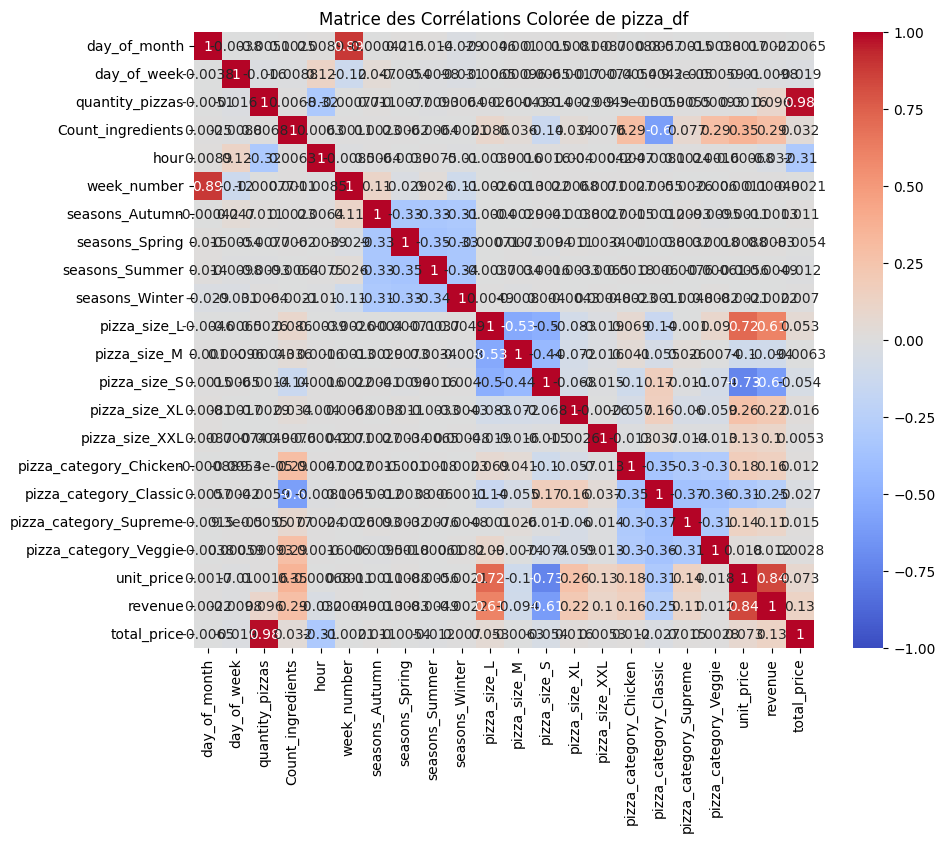

In [20]:
# la matrice de corrélation
correlation_matrix = data_corr.corr()
# creation figure pour la heatmap
plt.figure(figsize=(10, 8))

# Seaborn pour affichage ss forme de heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

# Ajout titre
plt.title('Matrice des Corrélations Colorée de pizza_df')
plt.show()

corrélation clair

In [21]:
data_pour_corr=data_corr[['quantity_pizzas', 'Count_ingredients','pizza_size_L', 'pizza_size_M','pizza_size_S', 'pizza_size_XL', 'pizza_size_XXL','pizza_category_Chicken', 'pizza_category_Classic','pizza_category_Supreme', 'pizza_category_Veggie', 'unit_price','revenue', 'total_price']]

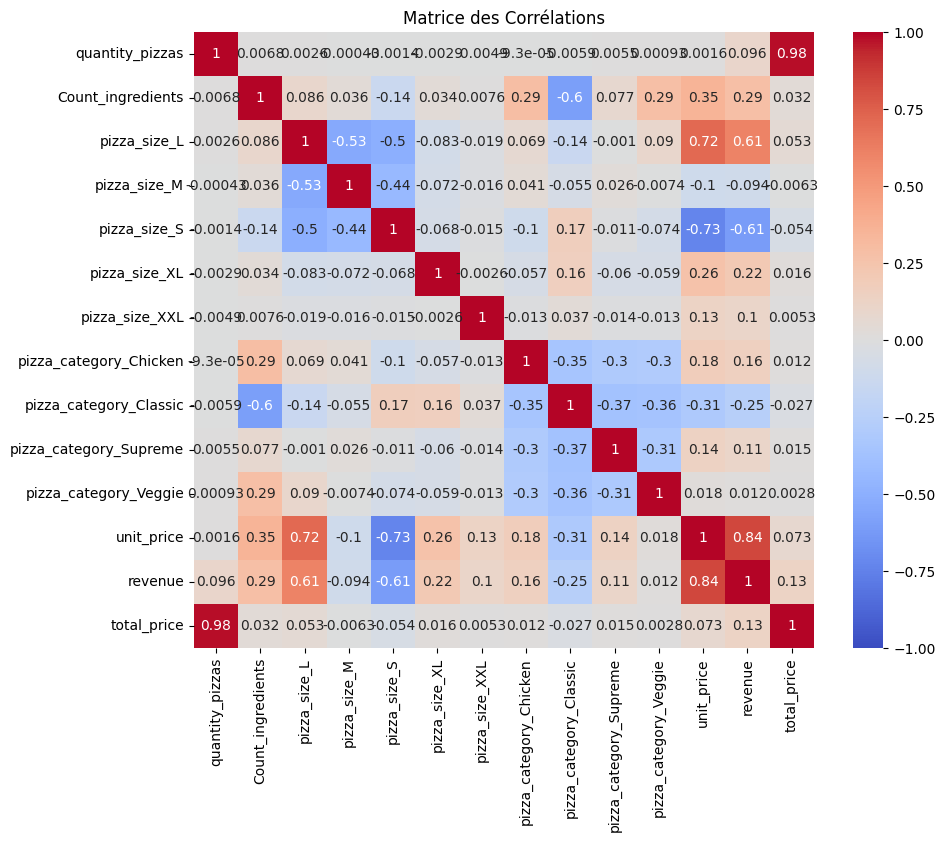

In [22]:
# la matrice de corrélation
correlation_matrix = data_pour_corr.corr()
# creation figure pour la heatmap
plt.figure(figsize=(10, 8))

# Seaborn pour affichage ss forme de heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

# Ajout titre
plt.title('Matrice des Corrélations')
plt.show()

In [23]:
# Separate target variable Y from features X
print("Separating target variable from features...")

## Choose the columns you want to have as your features
features_list = ['quantity_pizzas', 'Count_ingredients','pizza_size_L', 'pizza_size_M','pizza_size_S', 'pizza_size_XL', 'pizza_size_XXL','pizza_category_Chicken', 'pizza_category_Classic','pizza_category_Supreme', 'pizza_category_Veggie']

X = data_pour_corr.loc[:,features_list] # We add feature_list into our loc 
y = data_pour_corr.loc[:,"revenue"] # We set "revenue" as the target variable

print("...Done.")
print()

Separating target variable from features...
...Done.



on construit le modèle sans séparation
Ici avec Standard Scaller , y = revenue 

In [24]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X, y) # This steps is the actual training !
print("...Done.")

Train model...
...Done.


In [25]:
# Performance assessment
print("--- Assessing the performances of the model ---")

# Print R^2 scores
print("R2 score on training set : ", regressor.score(X, y))

--- Assessing the performances of the model ---
R2 score on training set :  0.6216291315289206


features importances

In [26]:
print("coefficients are: ", regressor.coef_) 
print("Constant is: ", regressor.intercept_)

coefficients are:  [ 4.16189103e-01  7.10619405e-01 -3.18980210e+11 -3.18980210e+11
 -3.18980210e+11 -3.18980210e+11 -3.18980210e+11 -1.26879228e+11
 -1.26879228e+11 -1.26879228e+11 -1.26879228e+11]
Constant is:  445859438253.6926


In [27]:
X

,quantity_pizzas,Count_ingredients,pizza_size_L,pizza_size_M,pizza_size_S,pizza_size_XL,pizza_size_XXL,pizza_category_Chicken,pizza_category_Classic,pizza_category_Supreme,pizza_category_Veggie
0,-0.848018,-1.605643,0,1,0,0,0,0,1,0,0
1,0.418260,-0.322880,0,1,0,0,0,0,1,0,0
2,0.418260,0.318501,1,0,0,0,0,0,0,0,1
3,0.418260,0.318501,1,0,0,0,0,0,0,1,0
4,0.418260,1.601264,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
48615,-0.214879,0.318501,0,1,0,0,0,1,0,0,0
48616,-0.214879,-0.322880,1,0,0,0,0,0,0,0,1
48617,-0.214879,-0.322880,0,0,1,0,0,0,1,0,0
48618,-0.848018,1.601264,1,0,0,0,0,0,0,0,1


In [28]:
column_names_corr = X.columns

In [29]:
# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": column_names_corr,
    "coefficients":regressor.coef_
})


In [30]:
feature_importance

,feature_names,coefficients
0,quantity_pizzas,4.161891e-01
1,Count_ingredients,7.106194e-01
2,pizza_size_L,-3.189802e+11
3,pizza_size_M,-3.189802e+11
4,pizza_size_S,-3.189802e+11
5,pizza_size_XL,-3.189802e+11
6,pizza_size_XXL,-3.189802e+11
7,pizza_category_Chicken,-1.268792e+11
8,pizza_category_Classic,-1.268792e+11
9,pizza_category_Supreme,-1.268792e+11


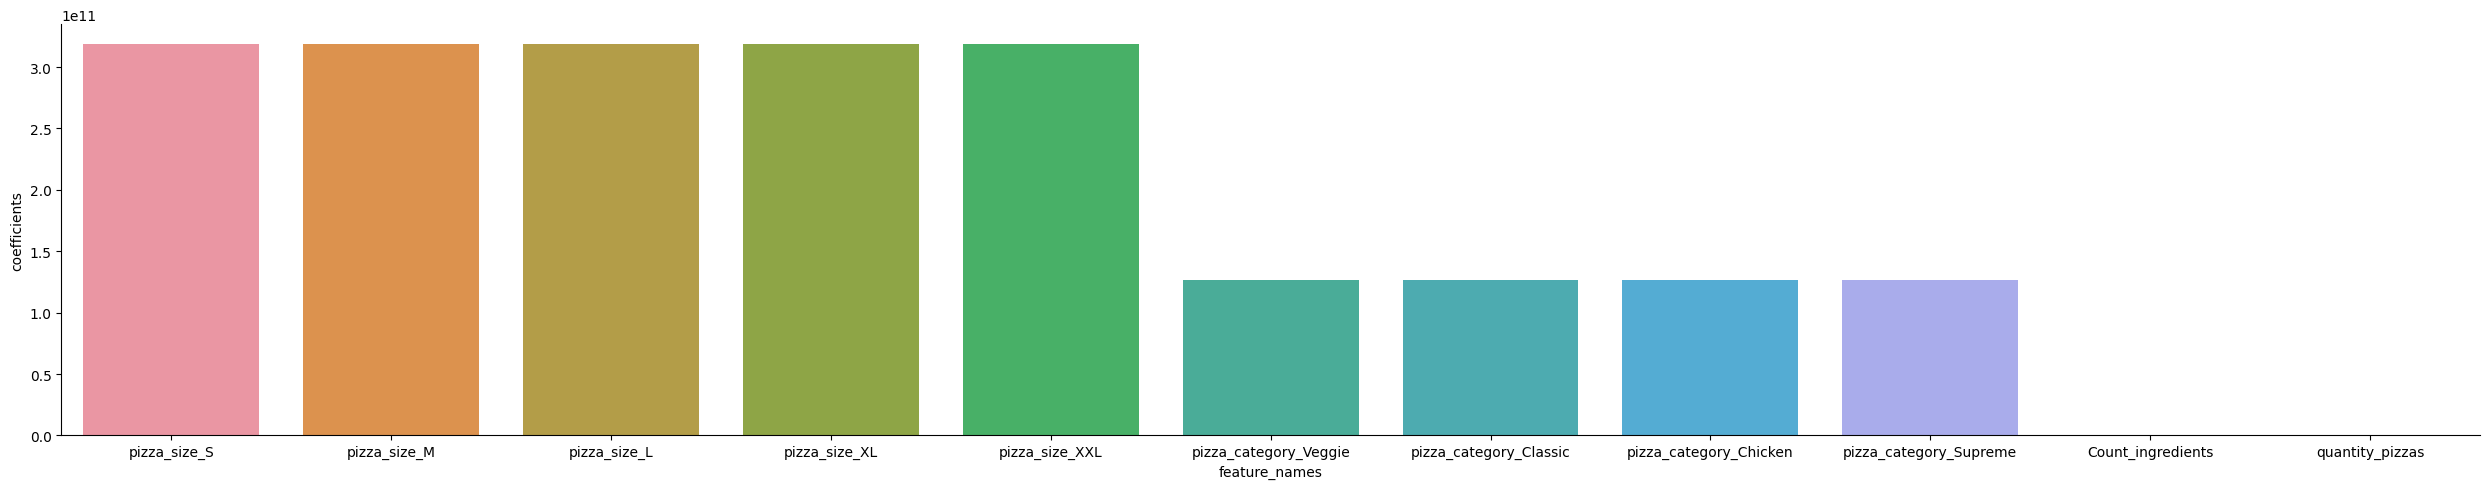

In [31]:
# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=40/8) # Resize graph

Le résultat montre que les features qui impactent le revenue sont la taille des pizzas et les categories de pizzas. 

Ici on va faire aussi une regression sans data train et test et sans standard scaller pour l'effet 

In [32]:
data_cible_new = df['revenue']

In [33]:
# création de nouveau ici sans standardscaller 
data_f_regression_new = pd.concat([df_intermediaire, features_dummised,data_cible_new], axis=1)

In [34]:
# Separate target variable Y from features X
print("Separating target variable from features...")

## Choose the columns you want to have as your features
features_list_new_reg = ['quantity_pizzas', 'Count_ingredients','pizza_size_L', 'pizza_size_M','pizza_size_S', 'pizza_size_XL', 'pizza_size_XXL','pizza_category_Chicken', 'pizza_category_Classic','pizza_category_Supreme', 'pizza_category_Veggie']

X_new_reg = data_f_regression_new.loc[:,features_list_new_reg] # We add feature_list into our loc 
y_new_reg= data_f_regression_new.loc[:,"revenue"] # We set "revenue" as the target variable

print("...Done.")
print()

Separating target variable from features...
...Done.



In [35]:
# Performance assessment
print("--- Assessing the performances of the model ---")

# Print R^2 scores
print("R2 score on training set : ", regressor.score(X_new_reg, y_new_reg))
# résultat négatif : le modèle n'est pas performant 

--- Assessing the performances of the model ---
R2 score on training set :  -0.931758684051625


je ne continue pas les recherches ici car je vois que ça ne va me mener nul part vu que le résultat est négatif

on construit le modèle sans séparation
Ici avec Standard Scaller , y = revenue 

In [36]:
#ici on refait la même chose pour voir les features impactant total_price
#  Separate target variable Y from features X
print("Separating target variable from features...")

## Choose the columns you want to have as your features
features_list = ['quantity_pizzas', 'Count_ingredients','pizza_size_L', 'pizza_size_M','pizza_size_S', 'pizza_size_XL', 'pizza_size_XXL','pizza_category_Chicken', 'pizza_category_Classic','pizza_category_Supreme', 'pizza_category_Veggie']

X_look_for_total_price = data_pour_corr.loc[:,features_list] # We add feature_list into our loc 
y_look_for_total_price = data_pour_corr.loc[:,"total_price"] # We set "revenue" as the target variable

print("...Done.")
print()

Separating target variable from features...
...Done.



In [37]:
# Train model
print("Train model...")
regressor_ = LinearRegression()
regressor_.fit(X_look_for_total_price, y_look_for_total_price) # This steps is the actual training !
print("...Done.")

Train model...
...Done.


In [38]:
print("coefficients are: ", regressor_.coef_) 
print("Constant is: ", regressor_.intercept_)

column_names_new_reg = X_look_for_total_price.columns
# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": column_names_new_reg,
    "coefficients":regressor_.coef_
})


coefficients are:  [ 4.71400702e+01  8.29427955e-01  2.62503585e+12  2.62503585e+12
  2.62503585e+12  2.62503585e+12  2.62503585e+12 -1.54265197e+12
 -1.54265197e+12 -1.54265197e+12 -1.54265197e+12]
Constant is:  -1082383874991.919


In [39]:
# Utilisation de z-scores pour détecter les valeurs aberrantes
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(X_look_for_total_price))
print(np.where(z_scores > 3)) 

(array([  121,   297,   341, ..., 48405, 48436, 48540]), array([5, 5, 0, ..., 0, 5, 5]))


In [40]:
X_look_for_total_price.iloc[:,0]

0       -0.848018
1        0.418260
2        0.418260
3        0.418260
4        0.418260
           ...   
48615   -0.214879
48616   -0.214879
48617   -0.214879
48618   -0.848018
48619   -0.848018
Name: quantity_pizzas, Length: 48620, dtype: float64

On fait une loi normal la moustache sur la quantité de commandes

In [41]:
df["moment_day"]

0          Day
1          Day
2          Day
3          Day
4          Day
         ...  
48615    Night
48616    Night
48617    Night
48618    Night
48619    Night
Name: moment_day, Length: 48620, dtype: object

In [57]:
x_moustache = df["pizza_category"]
y_moustache = df["quantity"]
col_moustache = df["moment_day"]

In [58]:
print(df[["pizza_category", "quantity", "moment_day"]].isnull().sum())

pizza_category    0
quantity          0
moment_day        0
dtype: int64


In [60]:
df[["pizza_category", "quantity", "moment_day"]]

,pizza_category,quantity,moment_day
0,Classic,1,Day
1,Classic,1,Day
2,Veggie,1,Day
3,Supreme,1,Day
4,Veggie,1,Day
...,...,...,...
48615,Chicken,1,Night
48616,Veggie,1,Night
48617,Classic,1,Night
48618,Veggie,1,Night


In [61]:
# Another example: `sns.catplot` - facing box plots
plt.figure()

sns.catplot(x=x_moustache, y=y_moustache, col=col_moustache, kind="box")

plt.show()

TypeError: 'NoneType' object is not subscriptable

<Figure size 640x480 with 0 Axes>

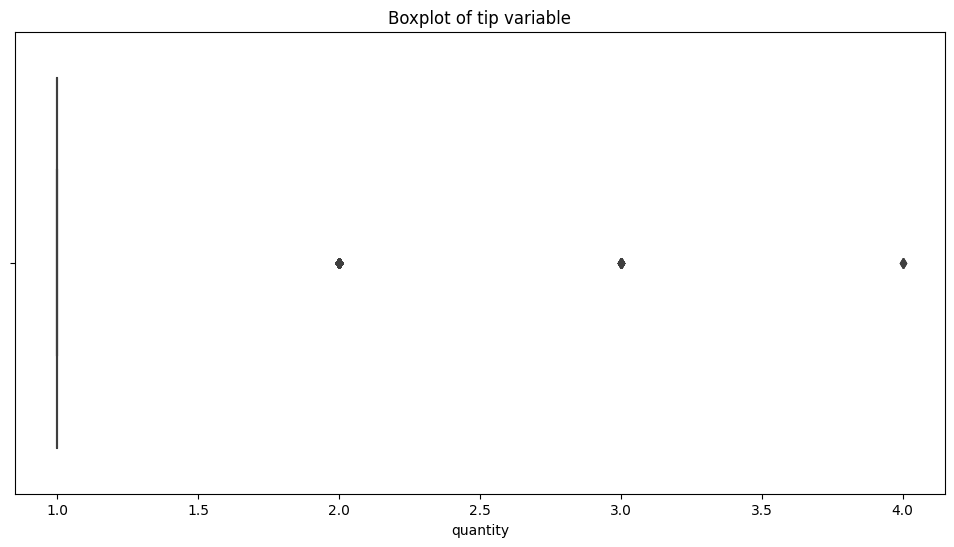

In [68]:

plt.figure(figsize=(12, 6))

sns.boxplot(x=y_moustache, data=df)

plt.title('Boxplot of tip variable')
plt.show()

#x_moustache = df["pizza_category"]
#y_moustache = df["quantity"]
#col_moustache = df["moment_day"]